<IPython.core.display.Javascript object>


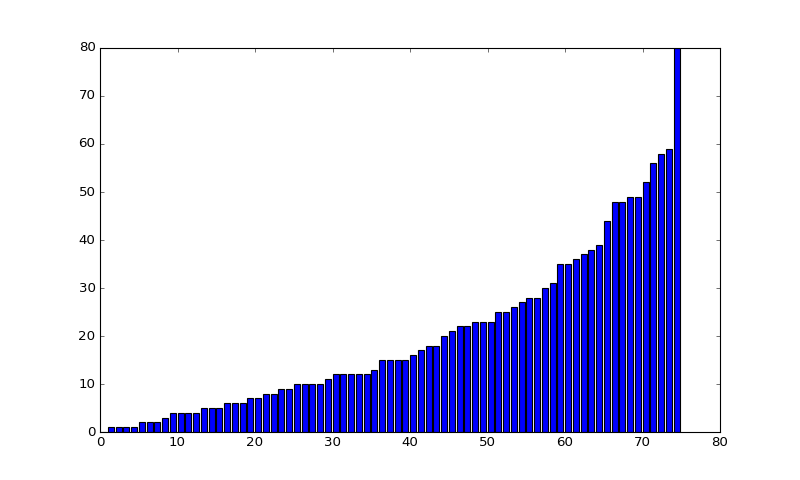

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.cm as cm
%matplotlib notebook

numParticipants = 75
numStartDollars = 20
numIterations = 1000

def animate(accounts, showColors=True):
    def _animate(i):
        plt.clf()
        indices = np.argsort(accounts[i])
        if showColors == True:
            colors = cm.Greys([x / numParticipants for x in indices])
        else:
            colors = 'b'
        plt.setp(plt.bar(np.arange(len(accounts[i])), height=np.array(accounts[i])[indices], color=colors))
    return _animate

accounts = {}
accounts[0] = numStartDollars * np.ones(numParticipants).astype(int)
for i in np.arange(1, numIterations):
    change = np.zeros(numParticipants).astype(int)
    for giverIndex, giverValue in enumerate(accounts[i-1]):
        if (giverValue > 0):
            change[giverIndex] = change[giverIndex] - 1
            recipientIndex = np.random.randint(0, numParticipants)
            while recipientIndex == giverIndex:
                recipientIndex = np.random.randint(0, numParticipants)
            change[recipientIndex] = change[recipientIndex] + 1
    accounts[i] = np.array([row[0] + row[1] for row in zip(accounts[i-1], change)])
    if i % 100 == 0:
        accounts[i] = np.sort(accounts[i])
    
fig = plt.figure(figsize=(10,6))
ani = animation.FuncAnimation(fig, animate(accounts, False), frames=numIterations, interval=100, repeat=True)
